In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

hotel_index = pd.read_csv('hotel_index.csv').to_sql('hotel_index', con='sqlite:///database.db', if_exists='replace', index=False)

In [12]:
hotel_index =  pd.read_sql('select * from hotel_index',con= 'sqlite:///database.db')
booking_date = pd.read_sql('select * from booking_date',con= 'sqlite:///database.db')
staying_date = pd.read_sql('select * from staying_date',con= 'sqlite:///database.db')

hotel_index

,Property,Total Rooms,Company
0,Kensington Olympia,10,HFS
1,Luxurious Air Conditioned Apt High Street Kens...,11,HFS
2,Barrington Lodge,18,HFS
3,Wembar Hotel,23,HFS
4,Marble Arch Apartments,6,HFS
...,...,...,...
58,The Cumberland Hotel,30,Harbour
59,North Coast Hotel,10,Harbour
60,Royal Hotel,45,Harbour
61,Citi Hotel,42,Harbour


### Fixing the Dates Columns Format

In [7]:
booking_date['Booking Date and Time'] = pd.to_datetime(booking_date['Booking Date and Time'])
staying_date['Check In'] = pd.to_datetime(staying_date['Check In'])
staying_date['Check Out'] = pd.to_datetime(staying_date['Check Out'])

KeyError: 'Booking Date and Time'

### Cutting the dataframe and making it only for the property and date. 

In [ ]:
b_df = booking_date
b_df = b_df[['Property','Booking Date and Time']].drop_duplicates(subset=['Property','Booking Date and Time'],keep='first')
b_df = b_df.sort_values(by=['Property','Booking Date and Time'])


## Run through the dataset and return the number of stays in the stays table and return it to the df_booking table 

In [ ]:
s_df = staying_date[['Property','Check In', 'Check Out']]

def count_occurrences(row):
    # Filter s_df where property matches
    mask = (s_df['Property'] == row['Property']) & \
           (s_df['Check In'] <= row['Booking Date and Time']) & \
           (s_df['Check Out'] > row['Booking Date and Time'])
    
    return mask.sum()  # Count occurrences

# Apply function to each row
b_df['Stays Count'] = b_df.apply(count_occurrences, axis=1)

# Display result
final_df = b_df

final_df = pd.merge(final_df,hotel_index[['Property','Company','Total Rooms']],how='left')
final_df['Occ_rate'] = final_df['Stays Count']/final_df['Total Rooms']
final_df
hfs = final_df[final_df['Property'] == 'Wonderful Apartments near Portobello Road']
hfs

,Property,Booking Date and Time,Stays Count,Company,Total Rooms,Occ_rate
571,Wonderful Apartments near Portobello Road,2025-03-01,4,HFS,4.0,1.00
572,Wonderful Apartments near Portobello Road,2025-03-02,4,HFS,4.0,1.00
573,Wonderful Apartments near Portobello Road,2025-03-03,4,HFS,4.0,1.00
574,Wonderful Apartments near Portobello Road,2025-03-05,2,HFS,4.0,0.50
575,Wonderful Apartments near Portobello Road,2025-03-06,1,HFS,4.0,0.25
576,Wonderful Apartments near Portobello Road,2025-03-07,4,HFS,4.0,1.00
577,Wonderful Apartments near Portobello Road,2025-03-09,3,HFS,4.0,0.75
578,Wonderful Apartments near Portobello Road,2025-03-10,3,HFS,4.0,0.75
579,Wonderful Apartments near Portobello Road,2025-03-11,3,HFS,4.0,0.75
580,Wonderful Apartments near Portobello Road,2025-03-12,3,HFS,4.0,0.75


Text(0.5, 0, 'Booking Date')

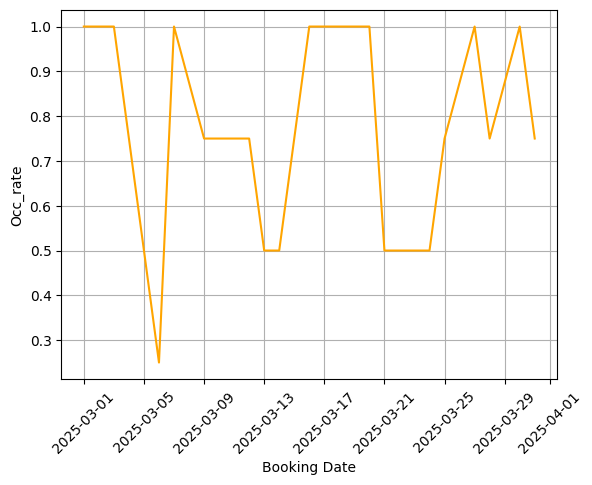

In [ ]:
import seaborn as sns

hfs = final_df[final_df['Property'] == 'Wonderful Apartments near Portobello Road']
hfs
hh = None
hrb = None 
stayz = None

sns.lineplot(hfs,
             x=hfs['Booking Date and Time'],
             y=hfs['Occ_rate'],
             color='orange'
             )
plt.grid(True)
plt.xticks(rotation=45)
plt.xlabel('Booking Date')
